In [1]:
%load_ext autoreload
%autoreload

In [2]:
from utils_v1 import *


In [3]:
from icecream import ic
import pdb
from sklearn import metrics
import importlib
import utils_v1
import sys
import numpy as np
from src.dataset import (
    MultipleDates,
    PAMultipleDates,
    MTMultipleDates,
    MAMultipleDates,
    MSMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates
from src.trainer.multioutput import TrainerMCDropout, TrainerSingleRun, TrainerEnsemble
from src.Logger import Logger


In [4]:
ic.configureOutput(includeContext=True)

In [5]:
useLessInferenceRuns = False
reducedInferenceRuns = 30

In [6]:
config = {
	"training": True,
	"inferring": True,
	"site": "MS",
	"training_date": "current", # values: earlier, current
	"mode": "single_run", # values: mcd, single_run, ensemble
	"uncertainty_method": "pred_entropy", # pred_var MI pred_entropy KL pred_entropy_single
	"loadInference": False,
	"removePolygons": True,
	"plotLandsat": False,
	"plotPOI": False,

	"save_probabilities": False,
	"addPastDeforestationInput": True,
	"classes_mode": False,
	"learning_rate": 1e-4,
    "use_cloud_mask": False,
}

In [7]:



if config['mode'] == 'mcd':
	trainerClass = TrainerMCDropout
	config['inference_times'] = 10
	config['training_times'] = 1
elif config['mode'] == 'single_run':
	trainerClass = TrainerSingleRun
	config['inference_times'] = 1
	config['training_times'] = 1
	config['uncertainty_method'] = 'pred_entropy_single'
elif config['mode'] == 'ensemble':
	trainerClass = TrainerEnsemble
	config['inference_times'] = 10
	config['training_times'] = 10
else:
	raise ValueError('Invalid mode')

print(config)

if config['site'] == 'PA':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2017, 2018]
	else:
		dates = [2018, 2019]

	dataset = PAMultipleDates(config = config,
			   dates = dates, 
		addPastDeforestationInput = config['addPastDeforestationInput'],
		borderBuffer = 2)	
elif config['site'] == 'MT':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2018, 2019]
	else:
		dates = [2019, 2020]

	dataset = MTMultipleDates(config = config,
			   dates = dates, 
	 	addPastDeforestationInput = config['addPastDeforestationInput'],
		borderBuffer = 2)	
elif config['site'] == 'MS':
	dates = [2019, 2020]
	dataset = MSMultipleDates(config = config,
			   dates = dates, 
	 	addPastDeforestationInput = config['addPastDeforestationInput'],
		borderBuffer = 2)		
else:
	raise ValueError('Invalid site')

if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerMultipleDates(
		dataset)
else:
	patchesHandler = PatchesHandler()



if config['training'] == False:

	if type(dataset) == PAMultipleDates:


		if config['training_date'] == 'current': exp = 0; repetition_id = 0
		elif config['training_date'] == 'earlier': exp = 1; repetition_id = 7
		 
	elif type(dataset) == MTMultipleDates:
		
		if config['training_date'] == 'current': exp = 2; repetition_id = 8
		elif config['training_date'] == 'earlier': exp = 3; repetition_id = 6		

	elif type(dataset) == MSMultipleDates:

		if config['training_date'] == 'current': exp = 0; repetition_id = 0
		elif config['training_date'] == 'earlier': exp = 1; repetition_id = 0		

else:

	exp = 10
	repetition_id = 0
	
logger = Logger()
trainer = trainerClass(config, dataset, patchesHandler, logger)
trainer.defineExperiment(exp)


{'training': True, 'inferring': True, 'site': 'MS', 'training_date': 'current', 'mode': 'single_run', 'uncertainty_method': 'pred_entropy_single', 'loadInference': False, 'removePolygons': True, 'plotLandsat': False, 'plotPOI': False, 'save_probabilities': False, 'addPastDeforestationInput': True, 'classes_mode': False, 'learning_rate': 0.0001, 'use_cloud_mask': False, 'inference_times': 1, 'training_times': 1}


ic| dataset.py:337 in __init__()- list(self.date_ids): [0]
ic| dataset.py:358 in __init__()
    self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8]]
ic| patchesHandler.py:166 in __init__()- self.input_image_shape: 9
ic| patchesHandler.py:167 in __init__()
    self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8]]


In [8]:
trainer.config

{'training': True,
 'inferring': True,
 'site': 'MS',
 'training_date': 'current',
 'mode': 'single_run',
 'uncertainty_method': 'pred_entropy_single',
 'loadInference': False,
 'removePolygons': True,
 'plotLandsat': False,
 'plotPOI': False,
 'save_probabilities': False,
 'addPastDeforestationInput': True,
 'classes_mode': False,
 'learning_rate': 0.0001,
 'use_cloud_mask': False,
 'inference_times': 1,
 'training_times': 1,
 'dropout_training': False}

In [9]:
exp

10

In [10]:
trainer.setExperimentPath()
trainer.createLogFolders()

In [11]:
# ic(type(dataset), exp, dataset.dates)


In [12]:

trainer.loadLabel()

D:/Jorge/datasets/deforestation/MS/deforestation_past_years.tif
Loaded deforestation past years


ic| dataset.py:453 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([334024764,   8717093,   6541094,   3824922,   2096535,   1305948,
                                                                      1003721,    903906,    318788,    701575,    310887,    440417,
                                                                       316180,    560438,    600838,    776899], dtype=int64))


Label where deforestation past years is actual date (2020) = 1


ic| dataset.py:456 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([334024764,   8717093,   6541094,   3824922,   2096535,   1305948,
                                                                      1003721,    903906,    318788,    701575,    310887,    440417,
                                                                       316180,    560438,    600838,    776899], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| dataset.py:460 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([334024764,   8717093,   6541094,   3824922,   2096535,   1305948,
                                                                      1003721,    903906,    318788,    701575,    310887,    440417,
                                                                       316180,    560438,    600838,    776899], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/MS/deforestation_before_2000_MS.tif


ic| dataset.py:464 in loadLabelFromDate()
    np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 208], dtype=uint8), array([126708038, 235735967], dtype=int64))
ic| dataset.py:466 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([334024764,   8717093,   6541094,   3824922,   2096535,   1305948,
                                                                      1003721,    903906,    318788,    701575,    310887,    440417,
                                                                       316180,    560438,    600838,    776899], dtype=int64))
ic| dataset.py:445 in loadLabel()
    label_per_date.shape: (18605, 19481, 1)


Removing bufer................
Mask label shape:  
 (18605, 19481, 1) 
 Unique values:  
 [0 1 2]


In [13]:

# Creating tile mask
trainer.createTrainValTestTiles()


Tiles size:  3721 3896
Mask size:  (18605, 19480)


In [14]:

trainer.label_mask.dtype

dtype('uint8')

In [15]:

trainer.getLabelCurrentDeforestation()

In [16]:

trainer.loadInputImage()

ic| dataset.py:387 in loadInputImage()
    image_stack.shape: (18605, 19481, 9)


Image shape:  (18605, 19481, 9)
mask:  (18605, 19480)
image stack:  (18605, 19480, 9)
ref : (18605, 19480, 1)


In [17]:

np.unique(trainer.image_stack[...,0], return_counts=True)

(array([0.        , 0.05263158, 0.10526316, 0.15789473, 0.21052632,
        0.2631579 , 0.31578946, 0.36842105, 0.42105263, 0.5263158 ,
        0.6315789 , 0.7368421 , 0.84210527, 0.94736844, 1.        ],
       dtype=float32),
 array([ 99662188,    560438,    316161,    440417,    310884,    701575,
           318766,    903906,   1003651,   1305903,   2096238,   3824633,
          6540581,   8716969, 235723090], dtype=int64))

In [18]:
trainer.maskNoDataAsNotConsideredClass()

self.image_stack.shape (18605, 19480, 9)


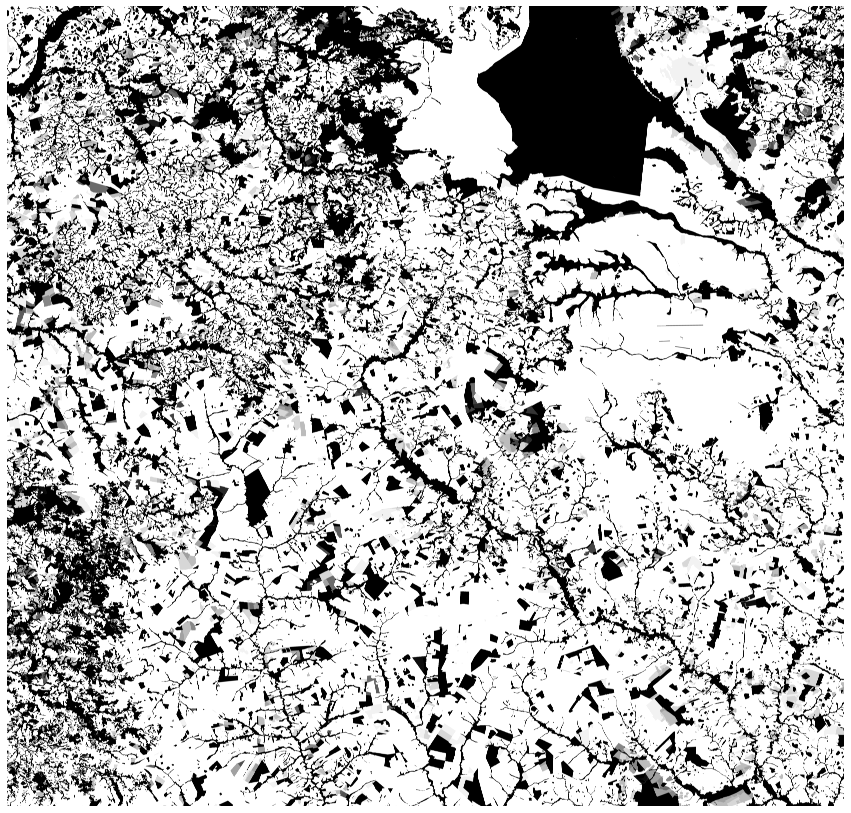

In [19]:

trainer.logger.plotFigure(trainer.image_stack[...,0], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False)

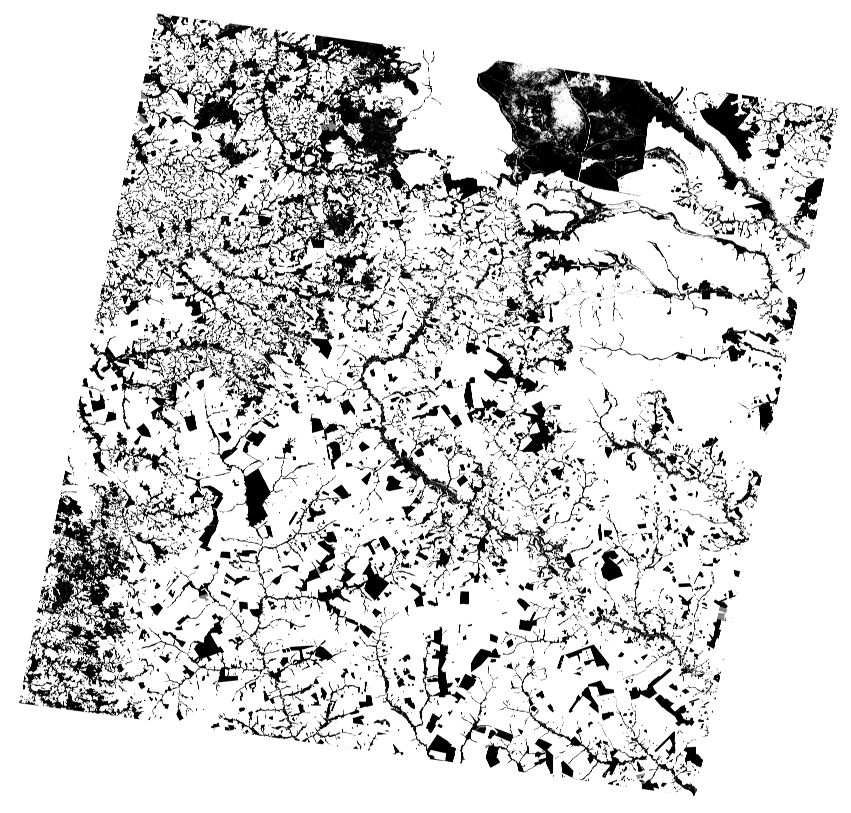

In [20]:

trainer.logger.plotFigure(trainer.label_mask, 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False)

In [21]:

trainer.getImageChannels()

ic| base.py:99 in getImageChannels()
    self.image_stack.shape: (18605, 19480, 9)
ic| base.py:101 in getImageChannels()- self.channels: 9


In [22]:

trainer.getTrainValTestMasks()

Training tiles:  [2, 4, 5, 6, 7, 12, 14, 15, 18, 21, 23, 24]
Validation tiles:  [9, 11, 25]
Test tiles:  [1, 3, 8, 10, 13, 16, 17, 19, 20, 22]


In [23]:

if config["training"] == True:
    # Extracting patches from the idx matrix
    trainer.createIdxImage()


ic| patchesHandler.py:25 in create_idx_image()
    im_idx_row.shape: (18605, 19480, 1)
    im_idx_col.shape: (18605, 19480, 1)
ic| patchesHandler.py:26 in create_idx_image()
    im_idx_row.dtype: dtype('uint16')
    im_idx_col.dtype: dtype('uint16')
ic| patchesHandler.py:32 in create_idx_image()
    im_idx.shape: (18605, 19480, 2)
    im_idx.dtype: dtype('uint16')


In [24]:
if config["training"] == True:
    trainer.extractCoords()

ic| patchesHandler.py:44 in extract_patches()
    coords.shape: (487, 510, 1, 128, 128, 2)
    coords.dtype: dtype('uint16')
ic| patchesHandler.py:48 in extract_patches()
    coords.shape: (248370, 2)
    coords.dtype: dtype('uint16')


In [25]:
if config["training"] == True:
    trainer.trainTestSplit()

ic| base.py:117 in trainTestSplit()
    self.coords_train.shape: (115271, 3)
    self.coords_val.shape: (28310, 3)


In [26]:
if config["training"] == True:
    trainer.label_mask.shape

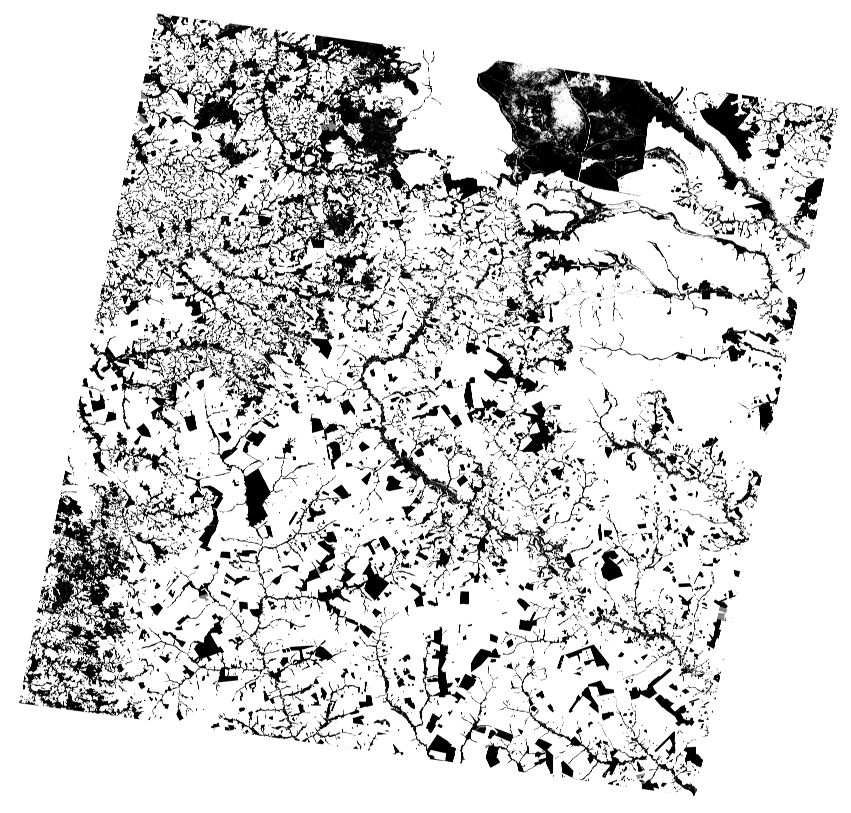

In [27]:
if config["training"] == True:

    trainer.logger.plotFigure(trainer.label_mask[...,-1], 
        name='Reference', cmap=plt.cm.gray, savefig=False)



In [28]:
if config["training"] == True:
    np.unique(trainer.label_mask)

In [29]:
if config["training"] == True:
    print(trainer.coords_train)

[[    0  3914     0]
 [    0  3952     0]
 [    0  3990     0]
 ...
 [18468 15352     0]
 [18468 15390     0]
 [18468 15428     0]]


In [30]:
if config["training"] == True:
    trainer.retrieveSamplesOfInterest()

training samples:  (1100, 3) validation samples:  (199, 3)


In [31]:
if config["training"] == True:
    inputSnipShow = True

In [32]:
# count, unique = np.unique(label_mask, return_counts=True)
# print(count, unique)
# print(unique[1]/unique[0])

In [33]:
'''
count, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [34]:
'''
count, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [35]:
trainer.dataset.image_channels

[[0, 1, 2, 3, 4, 5, 6, 7, 8]]

In [36]:
trainer.dataset.bands

4

ic| Logger.py:38 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.4239709
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.35195705


[16986 14706     0]
coord [16986 14706     0]
image_patch.shape (18605, 19480, 1)
reference_patch.shape (18605, 19480, 9)


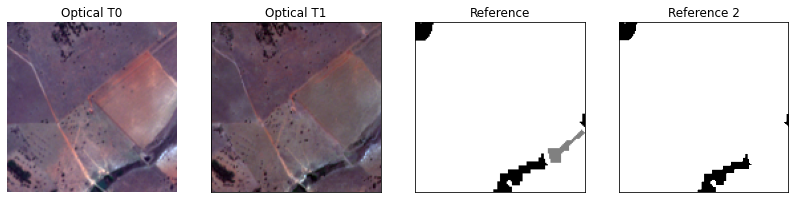

In [38]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 1000)


ic| Logger.py:38 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.13227947
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.26146424


[1558 5054    0]
coord [1558 5054    0]
image_patch.shape (18605, 19480, 1)
reference_patch.shape (18605, 19480, 9)


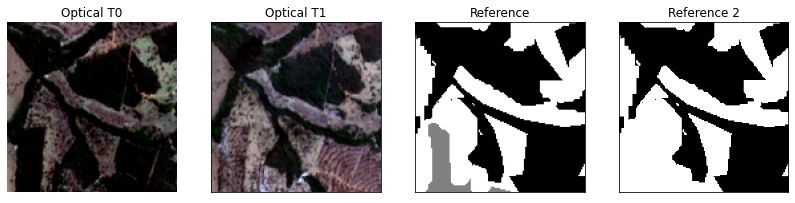

In [39]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 97)


ic| Logger.py:38 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.37044182
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.3878483


[4598 7068    0]
coord [4598 7068    0]
image_patch.shape (18605, 19480, 1)
reference_patch.shape (18605, 19480, 9)


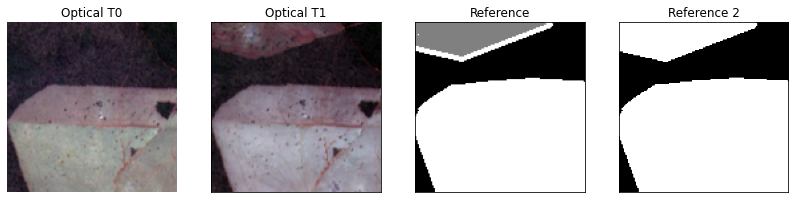

In [40]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 500)

ic| Logger.py:38 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.42490283
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.38406196


[3990 7562    0]
coord [3990 7562    0]
image_patch.shape (18605, 19480, 1)
reference_patch.shape (18605, 19480, 9)


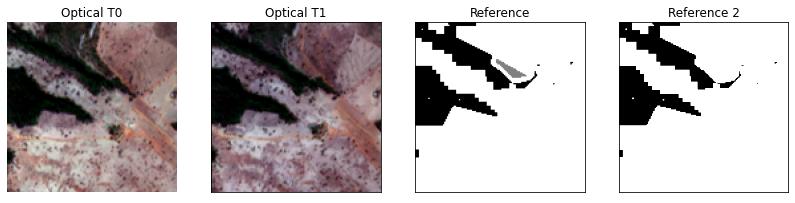

In [41]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 400)

In [42]:
if config["training"] == True:
    trainer.getGenerators()


In [43]:
if config["training"] == True:
    trainer.fixChannelNumber()

In [44]:
if config["training"] == True:
    print(trainer.path_exp)

D:/Jorge/datasets/deforestation/experiments/MS/exp10


In [45]:
if config["training"] == True:
    print(trainer.channels)

9


In [46]:
if config["training"] == True:
    print(trainer.image_stack.shape)

(18605, 19480, 9)


In [47]:
if config["training"] == True:
    print("config['training_times']", config["training_times"])

config['training_times'] 1


In [48]:
if config["training"] == True:
    for tm in range(config['training_times']):
        trainer.repetition_id = tm
        trainer.train()

time:  0


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_enc_net (InputLayer)      [(None, 128, 128, 9) 0                                            
__________________________________________________________________________________________________
res1_net1 (Conv2D)              (None, 128, 128, 16) 1312        input_enc_net[0][0]              
__________________________________________________________________________________________________
drop_net1 (SpatialDropout2D)    (None, 128, 128, 16) 0           res1_net1[0][0]                  
__________________________________________________________________________________________________
res2_net1 (Conv2D)              (None, 128, 128, 16) 2320        drop_net1[0][0]                  
______________________________________________________________________________________________

c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\engine\training.py:1969: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


103/103 [==============================] - 10s 51ms/step - loss: 0.0835 - accuracy: 0.6118 - val_loss: 0.0654 - val_accuracy: 0.6533

Epoch 00001: val_loss improved from inf to 0.06537, saving model to D:/Jorge/datasets/deforestation/experiments/MS/exp10/models\resunet_0.h5


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/100
103/103 [==============================] - 4s 41ms/step - loss: 0.0622 - accuracy: 0.7524 - val_loss: 0.0529 - val_accuracy: 0.7864

Epoch 00002: val_loss improved from 0.06537 to 0.05294, saving model to D:/Jorge/datasets/deforestation/experiments/MS/exp10/models\resunet_0.h5
Epoch 3/100
103/103 [==============================] - 4s 41ms/step - loss: 0.0477 - accuracy: 0.8588 - val_loss: 0.0491 - val_accuracy: 0.8491

Epoch 00003: val_loss improved from 0.05294 to 0.04906, saving model to D:/Jorge/datasets/deforestation/experiments/MS/exp10/models\resunet_0.h5
Epoch 4/100
103/103 [==============================] - 4s 40ms/step - loss: 0.0427 - accuracy: 0.8782 - val_loss: 0.0486 - val_accuracy: 0.8434

Epoch 00004: val_loss improved from 0.04906 to 0.04858, saving model to D:/Jorge/datasets/deforestation/experiments/MS/exp10/models\resunet_0.h5
Epoch 5/100
103/103 [==============================] - 4s 40ms/step - loss: 0.0405 - accuracy: 0.8859 - val_loss: 0.0565 - val_acc

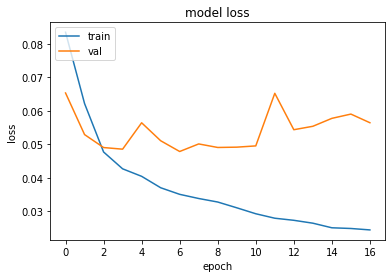

In [49]:
if config["training"] == True:
    trainer.plotHistory()


In [50]:
repetition_id = 0

In [51]:
if config["inferring"] != True:
    sys.exit()
else:
    trainer.repetition_id = repetition_id

In [52]:
trainer.image_stack.shape

(18605, 19480, 9)

In [53]:
trainer.patchesHandler.dataset.image_channels[-1]

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [54]:
if issubclass(type(dataset), MultipleDates):
	trainer.channels = trainer.patchesHandler.input_image_shape
	trainer.image_stack = trainer.image_stack[..., trainer.patchesHandler.dataset.image_channels[-1]]
	trainer.label_mask = trainer.label_mask[...,-1]


In [55]:
trainer.image_stack.shape

(18605, 19480, 9)

In [56]:
trainer.setPadding()

-35.0 -8.0


In [57]:
trainer.infer()

ic| base.py:266 in infer()
    self.path_models+ '/' + self.method +'_'+str(self.repetition_id)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/MS/exp10/models/resunet_0.h5'


Dropout training mode: False
time:  0


In [58]:
trainer.loadPredictedProbabilities()

In [59]:
trainer.prob_rec.shape

(18640, 19488, 1)

In [60]:
'''
if useLessInferenceRuns == True:
    ic(reducedInferenceRuns)

    prob_rec_all = prob_rec.copy()
    prob_rec = prob_rec_all[:reducedInferenceRuns]
    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))
'''

'\nif useLessInferenceRuns == True:\n    ic(reducedInferenceRuns)\n\n    prob_rec_all = prob_rec.copy()\n    prob_rec = prob_rec_all[:reducedInferenceRuns]\n    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))\n'

In [61]:
trainer.prob_rec.shape

(18640, 19488, 1)

In [62]:
trainer.getMeanProb()

In [63]:
trainer.logger.getStats(trainer.mean_prob)

ic| Logger.py:119 in getStats()
    np.min(value): 2.493999e-08
    np.mean(value): 0.004617602
    np.max(value): 0.9752829


In [64]:
ic(trainer.mean_prob.shape)

ic| 3681128488.py:1 in <cell line: 1>()
    trainer.mean_prob.shape: (18640, 19488)


(18640, 19488)

In [65]:
trainer.unpadMeanProb()

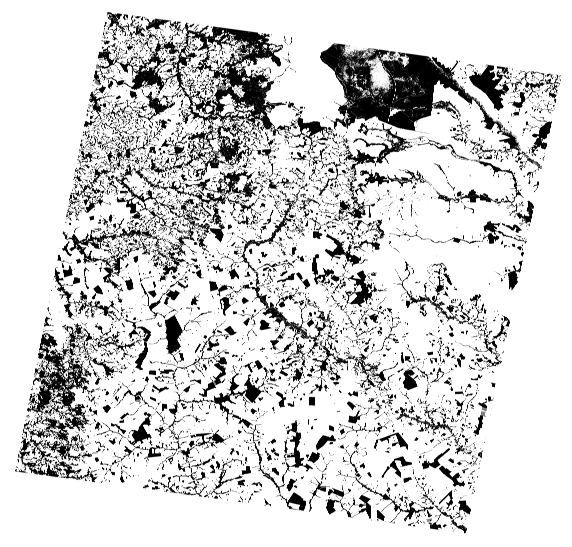

In [66]:
trainer.logger.plotFigure(trainer.label_mask, 
            name='Reference mask', figsize=(10,10), cmap=plt.cm.gray, savefig=True)

In [67]:
trainer.squeezeLabel()

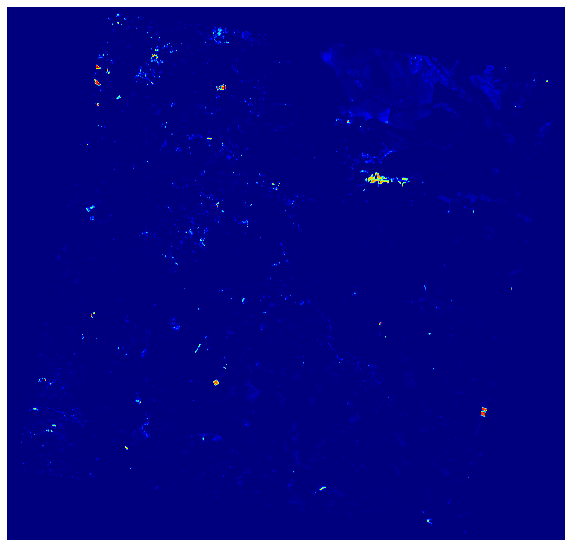

In [68]:
trainer.setMeanProbNotConsideredAreas()
trainer.logger.plotFigure(trainer.mean_prob, 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

In [69]:
print(trainer.label_mask.shape)

(18605, 19480)


In [70]:
trainer.getLabelTest()

(25642091,)
(array([0, 1], dtype=uint8), array([25473071,   169020], dtype=int64))


In [71]:
# trainer.getMAP()

In [72]:
trainer.prob_rec.shape

(18640, 19488, 1)

In [73]:
trainer.preprocessProbRec()
print(trainer.prob_rec.shape)

(1, 18640, 19488, 1)


In [74]:
trainer.prob_rec.shape

(1, 18640, 19488, 1)

In [75]:
trainer.logger.getStats(trainer.prob_rec)

ic| Logger.py:119 in getStats()
    np.min(value): 2.493999e-08
    np.mean(value): 0.004617602
    np.max(value): 0.9752829


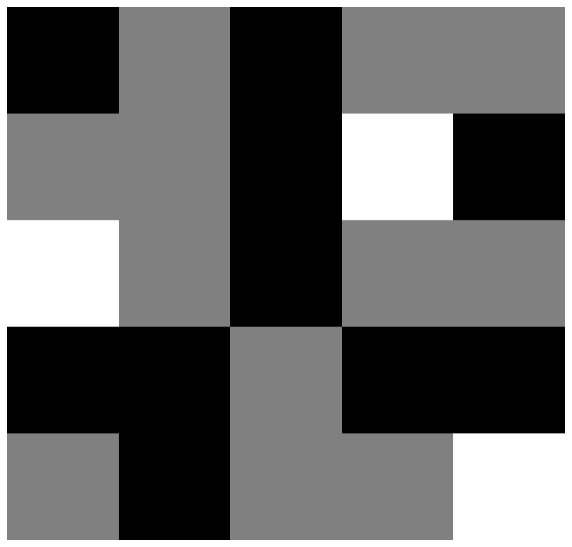

In [76]:
trainer.logger.plotFigure(trainer.mask_tr_val, 
            name=trainer.dataset.site + trainer.title_name + ' Train val mask.png', figsize=(10,10), savefig=False)

In [77]:
trainer.getLabelCurrentDeforestation()

In [78]:
trainer.applyProbabilityThreshold()

(18605, 19480)
Single entropy
(array([0., 1.], dtype=float32), array([361885195,    540205], dtype=int64))


ic| base.py:394 in applyProbabilityThreshold()
    self.predicted_unpad.shape: (18605, 19480)
    self.predicted.shape: (18605, 19480)


In [79]:
trainer.getTestValues()

ic| base.py:417 in getTestValues()- predicted_test.shape: (144970160,)
ic| base.py:426 in getTestValues()- predicted_test.shape: (25642091,)


In [80]:
trainer.removeSmallPolygons()

ic| metrics.py:213 in removeSmallPolygonsForMetrics()
    np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([361923396,    502004], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([361999900,    425500], dtype=int64))
ic| metrics.py:215 in removeSmallPolygonsForMetrics()
    np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([362348896,     76504], dtype=int64))


In [81]:
trainer.calculateMetrics()

ic| base.py:470 in calculateMetrics()
    self.f1: 77.74
    self.precision: 76.05
    self.recall: 79.52


In [82]:
trainer.getValidationValuesForMetrics()
trainer.calculateMetricsValidation()

ic| base.py:399 in getValidationValuesForMetrics()
    self.label_mask_val.shape: (43491048,)
ic| base.py:405 in getValidationValuesForMetrics()
    self.label_mask_val_valid.shape: (5772513,)
ic| base.py:481 in calculateMetricsValidation()
    f1_val: 11.57
    precision_val: 6.23
    recall_val: 80.77
    mAP_val: 65.16


In [83]:
calculateMAPWithoutSmallPolygons = False
if calculateMAPWithoutSmallPolygons == True:
    trainer.calculateMAPWithoutSmallPolygons()

In [84]:
trainer.get_label_no_buffer()

D:/Jorge/datasets/deforestation/MS/deforestation_past_years.tif
Loaded deforestation past years


ic| dataset.py:453 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([334024764,   8717093,   6541094,   3824922,   2096535,   1305948,
                                                                      1003721,    903906,    318788,    701575,    310887,    440417,
                                                                       316180,    560438,    600838,    776899], dtype=int64))


Label where deforestation past years is actual date (2020) = 1


ic| dataset.py:456 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([334024764,   8717093,   6541094,   3824922,   2096535,   1305948,
                                                                      1003721,    903906,    318788,    701575,    310887,    440417,
                                                                       316180,    560438,    600838,    776899], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| dataset.py:460 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([334024764,   8717093,   6541094,   3824922,   2096535,   1305948,
                                                                      1003721,    903906,    318788,    701575,    310887,    440417,
                                                                       316180,    560438,    600838,    776899], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/MS/deforestation_before_2000_MS.tif


ic| dataset.py:464 in loadLabelFromDate()
    np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 208], dtype=uint8), array([126708038, 235735967], dtype=int64))
ic| dataset.py:466 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([334024764,   8717093,   6541094,   3824922,   2096535,   1305948,
                                                                      1003721,    903906,    318788,    701575,    310887,    440417,
                                                                       316180,    560438,    600838,    776899], dtype=int64))
ic| dataset.py:445 in loadLabel()
    label_per_date.shape: (18605, 19481, 1)


In [85]:
trainer.getErrorMask()

(array([0., 1.], dtype=float32), array([362128771,    296629], dtype=int64))


In [86]:
trainer.getErrorMaskToShowRGB()

[0. 1.]


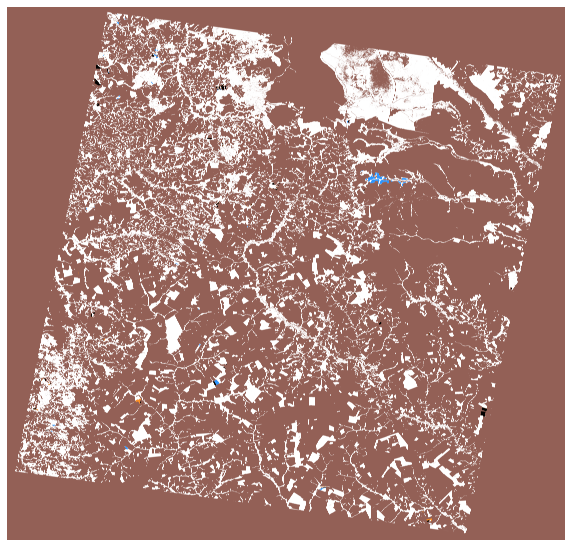

In [87]:
trainer.logger.plotFigure(trainer.error_mask_to_show_rgb[...,::-1], 
            name=trainer.dataset.site + trainer.title_name + ' error mask color.png', 
            figsize=(10,10), savefig=True, dpi=300)

In [88]:
'''
import types

trainer.setUncertainty = types.MethodType(setUncertainty, trainer)
'''


'\nimport types\n\ntrainer.setUncertainty = types.MethodType(setUncertainty, trainer)\n'

In [89]:
trainer.setUncertainty()

ic| uncertainty.py:49 in single_experiment_entropy()
    pred_entropy.shape: (18640, 19488)


In [90]:
trainer.uncertainty_map[trainer.uncertainty_map>1] = 1

In [91]:
trainer.logger.getStats(trainer.uncertainty_map)

ic| Logger.py:119 in getStats()
    np.min(value): 4.3661927e-07
    np.mean(value): 0.0120085385
    np.max(value): 0.36787948


In [92]:
trainer.getUncertaintyToShow()
trainer.logger.getStats(trainer.uncertainty_to_show)


ic| Logger.py:119 in getStats()
    np.min(value): 0.0
    np.mean(value): 0.007760541
    np.max(value): 0.36787948


ic| 2250769769.py:4 in <cell line: 4>()
    trainer.uncertainty_to_show.shape: (18605, 19480)


(18605, 19480)

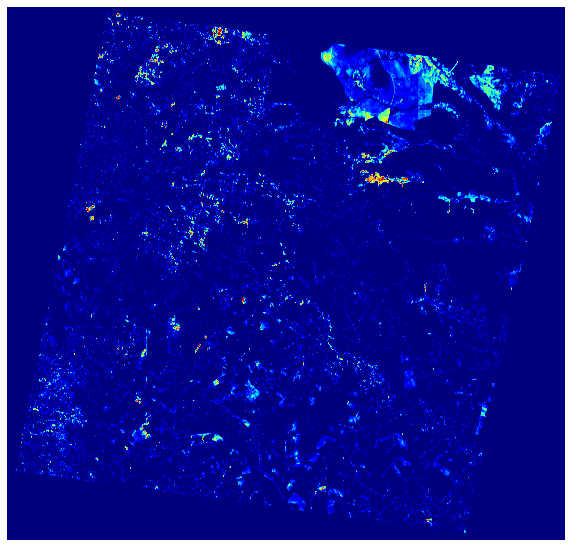

In [93]:

trainer.logger.plotFigure(trainer.uncertainty_to_show, 
            name=trainer.dataset.site + trainer.title_name + ' uncertainty '+trainer.config['uncertainty_method']+'.png', figsize=(10,10), cmap='jet', savefig=True)

ic(trainer.uncertainty_to_show.shape)



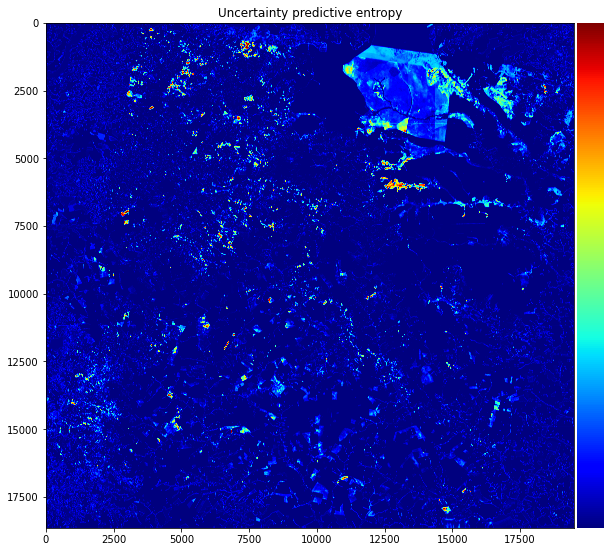

In [94]:

import src.uncertainty
fig, ax = plt.subplots(1,1,figsize=(10,10))
src.uncertainty.show_im(trainer.uncertainty_map, ax, title = 'Uncertainty predictive entropy')
plt.axis('off')
plt.savefig('output/figures/Para' + trainer.title_name + ' uncertainty '+trainer.config['uncertainty_method']+'.png', 
    dpi=150, bbox_inches='tight')

In [95]:
trainer.getValidationValues2()
trainer.getTestValues2()

ic| base.py:521 in getTestValues2()
    self.label_mask.shape: (18605, 19480)
ic| base.py:522 in getTestValues2()
    self.mask_amazon_ts.shape: (18605, 19480)
ic| base.py:526 in getTestValues2()
    self.label_mask_test.shape: (144970160,)
ic| base.py:534 in getTestValues2()
    self.error_mask_test.shape: (25612345,)


ic| 3562741751.py:8 in plotCropSample()
    trainer.dataset.previewLims1: array([11500, 12500,  9000, 10000])
    trainer.dataset.previewLims2: array([ 5000,  6000,  9500, 10500])
ic| 3562741751.py:10 in plotCropSample()
    np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([0], dtype=uint8)
ic| 3562741751.py:12 in plotCropSample()
    np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))


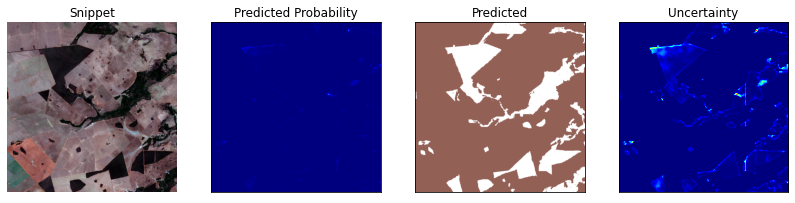

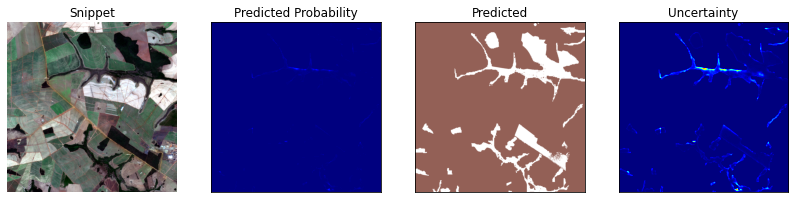

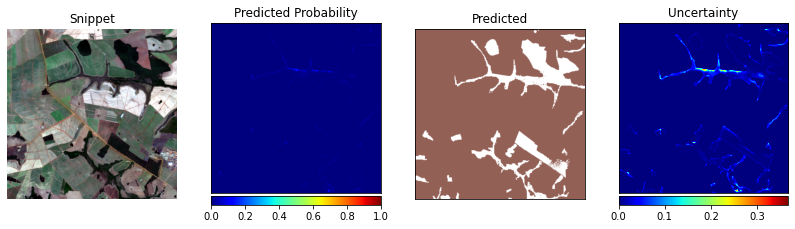

In [99]:
trainer.logger.plotCropSample(trainer)

In [100]:
if config["plotLandsat"] == True:
    label_tmp_dates = []
    for date in dataset.prodes_dates:
        label_tmp_date = dataset.loadLabelFromDate(date)
        label_tmp_date = label_tmp_date[:trainer.mask_tiles.shape[0], :trainer.mask_tiles.shape[1]]
        label_tmp_dates.append(label_tmp_date)

In [101]:
if config["plotLandsat"] == True:
    # del trainer.image_stack
    import src.lansdatLoader as ll
    import importlib
    importlib.reload(ll)
    landsatLoader = ll.LandsatLoader(dataset)
    ims = landsatLoader.load()
    for idx in range(len(ims)):
        ims[idx] = ims[idx][:trainer.mask_tiles.shape[0], :trainer.mask_tiles.shape[1],:]
    ims = landsatLoader.darken_past_deforestation(ims, trainer.label_no_buffer)
    ims = landsatLoader.add_deforestation_edges_by_date(ims, label_tmp_dates[:])

In [102]:
if config["plotLandsat"] == True:
    logger.plotCropSampleLandsat(trainer, ims)

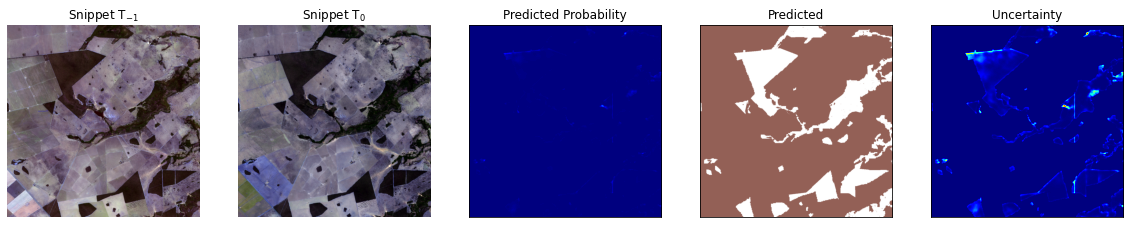

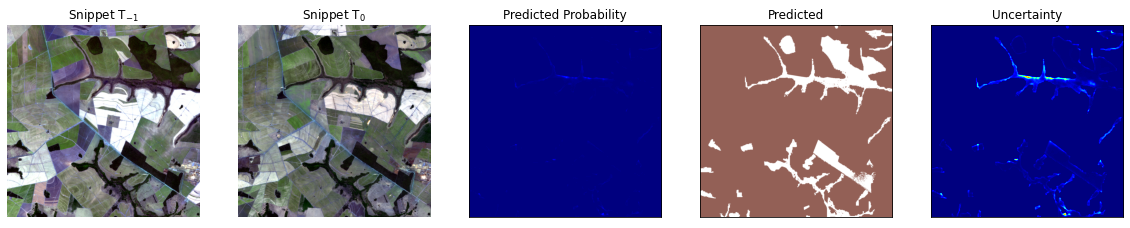

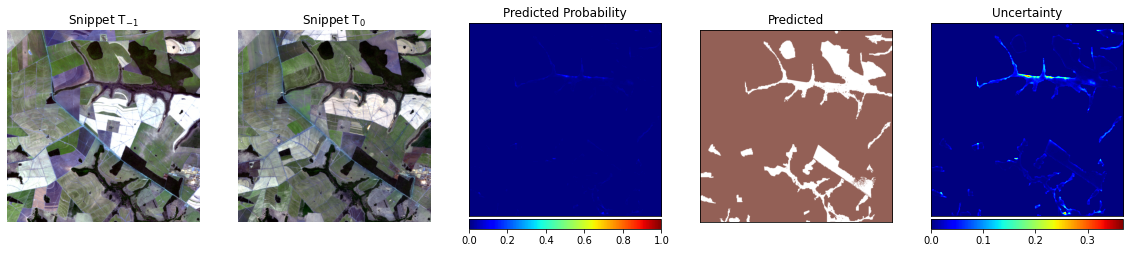

In [106]:
trainer.logger.plotCropSampleT0T1(trainer)

In [107]:
trainer.logger.getStats(trainer.uncertainty)


ic| Logger.py:119 in getStats()
    np.min(value): 1.7875338e-05
    np.mean(value): 0.03657456
    np.max(value): 0.36787948


In [108]:
'''
trainer.getOtherUncertaintyMetrics()
print(trainer.sUEO)

print(trainer.ece_score)  
'''

'\ntrainer.getOtherUncertaintyMetrics()\nprint(trainer.sUEO)\n\nprint(trainer.ece_score)  \n'

In [109]:
if config["plotPOI"] == True and config['site'] == 'PA':

    print(trainer.mean_prob.shape)
    font = {'family': "Times New Roman",
            'color':  'white',
            'weight': 'bold',
            'size': 24,
            }

    lims = dataset.previewLims1
    im = trainer.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
    plt.figure(figsize=(10,10))
    plt.imshow(im, cmap='jet')

    letters = ['A', 'B', 'C', 'D', 'E', 'F']

    for poi_id in range(4):
            
            plt.text(trainer.dataset.snippet_coords['snippet_id0'][poi_id][1], 
                    trainer.dataset.snippet_coords['snippet_id0'][poi_id][0], 
                    letters[poi_id], fontdict=font)
    plt.axis('off')

    plt.savefig(os.path.join('output/pdf_plot_results', 
                            'pdf_plot_poi0.png'), 
    dpi=150, bbox_inches='tight')

    lims = dataset.previewLims2
    im = trainer.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
    plt.figure(figsize=(10,10))
    plt.imshow(im, cmap='jet')

    letters = ['E', 'F']

    print(trainer.dataset.snippet_coords['snippet_id1'])
    for poi_id in range(2):
            
            plt.text(trainer.dataset.snippet_coords['snippet_id1'][poi_id][1], 
                    trainer.dataset.snippet_coords['snippet_id1'][poi_id][0], 
                    letters[poi_id], fontdict=font)
    plt.axis('off')
            
    plt.savefig(os.path.join('output/pdf_plot_results', 
                            'pdf_plot_poi1.png'), 
    dpi=150, bbox_inches='tight')

In [110]:
if config["plotPOI"] == True and config['site'] == 'PA':
    trainer.getPOIValues()


In [111]:

if config["plotPOI"] == True and config['site'] == 'PA':
    import pickle
    with open('output/log/log_ensemble_.pkl', 'wb') as f:
                pickle.dump(trainer.snippet_poi_results, f)


In [116]:
from src import metrics as _metrics

def getUncertaintyAAValues(self):



    # self.threshold_list = [0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36]

    # self.threshold_list = [0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36, np.max(uncertainty)-0.003]
    if self.config['uncertainty_method'] == "pred_entropy_single":
        self.threshold_list = [0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                            0.25, 0.27, 0.3, 0.34, 0.36, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
    if self.config['uncertainty_method'] == "pred_entropy":
            if self.classes_mode == False:
                    self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                            0.25, 0.27, 0.3, 0.34, 0.36, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                    # self.threshold_list = [0.0025, 0.025, 0.05, 0.1, 0.2, 0.4, 
                    #         0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
            else:
                    self.threshold_list = [0.0025, 0.025, 0.05, 0.075, 0.1, 0.2, 0.4, 
                    0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                    
                    # self.threshold_list = [0.13, 0.15, 0.2, 0.225, 
                    # 0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]
    elif self.config['uncertainty_method'] == "pred_var":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*0.13/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.0015, np.max(self.uncertainty)-0.0008]
    elif self.config['uncertainty_method'] == "MI":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*0.235/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
    elif self.config['uncertainty_method'] == "KL":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.006, np.max(self.uncertainty)-0.003]
    elif self.config['uncertainty_method'] == "evidential":
            # self.threshold_list = [0.015, 0.03, 0.04]
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [ 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [ 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

            self.threshold_list = [0.13, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

            # self.threshold_list = [ 0.15, 0.2,  
            #          0.3, 0.35, 0.4, 0.5, 0.6, 0.7]

            # self.threshold_list = [0.015,0.1, 0.2, 0.27, 0.36, 0.45, 0.55, 0.65]

            # self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(uncertainty)-0.006, np.max(uncertainty)-0.003]
                    
            # self.threshold_list = np.linspace(np.min(uncertainty) + 0.0015, np.max(uncertainty) - 0.0015, 19)
    print(self.threshold_list)
    self.loadThresholdMetrics = False
    if self.loadThresholdMetrics == False:
            # self.threshold_list = [0.1]
            # y_test
            ic(self.uncertainty.shape, self.label_mask_current_deforestation_test.shape)

            metrics_values = _metrics.getAA_Recall(self.uncertainty, 
                    self.label_mask_current_deforestation_test, 
                    self.predicted_test, self.threshold_list)

            # ic(metrics_values)


    self.m = {'precision_L': metrics_values[:,0],
            'recall_L': metrics_values[:,1],
            'recall_Ltotal': metrics_values[:,2],
            'AA': metrics_values[:,3],
            'precision_H': metrics_values[:,4],
            'recall_H': metrics_values[:,5],
            'UEO': metrics_values[:,6]}

    self.m['f1_L'] = 2*self.m['precision_L']*self.m['recall_L']/(self.m['precision_L']+self.m['recall_L'])
    self.m['f1_H'] = 2*self.m['precision_H']*self.m['recall_H']/(self.m['precision_H']+self.m['recall_H'])


In [117]:

import types

trainer.getUncertaintyAAValues = types.MethodType(getUncertaintyAAValues, trainer)



Get precision-recall threshold

In [118]:

trainer.getUncertaintyAAValues()

ic| 810240186.py:62 in getUncertaintyAAValues()
    self.uncertainty.shape: (25612345,)
    self.label_mask_current_deforestation_test.shape: (25612345,)


[0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 0.25, 0.27, 0.3, 0.34, 0.36, 0.3648794801235199, 0.3663794801235199]
threshold 0.0075


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (15658322,)
    predicted_test_classified_incorrect.shape: (15658322,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:293: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_L = TP_L / (TP_L + FP_L)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 15658322
    len(label_mask_current_deforestation_test): 25612345
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 15658322
    len(label_mask_current_deforestation_test): 25612345


[       nan 0.         0.         0.61135839 0.76048864 0.79516281
 0.00459583]
threshold 0.01


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (14371266,)
    predicted_test_classified_incorrect.shape: (14371266,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:293: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_L = TP_L / (TP_L + FP_L)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 14371266
    len(label_mask_current_deforestation_test): 25612345
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 14371266
    len(label_mask_current_deforestation_test): 25612345


[       nan 0.         0.         0.561107   0.76048864 0.79525337
 0.00500616]
threshold 0.015


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (12394474,)
    predicted_test_classified_incorrect.shape: (12394474,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:293: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_L = TP_L / (TP_L + FP_L)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 12394474
    len(label_mask_current_deforestation_test): 25612345
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 12394474
    len(label_mask_current_deforestation_test): 25612345


[       nan 0.         0.         0.48392578 0.76048864 0.79576693
 0.00579632]
threshold 0.025


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (9649943,)
    predicted_test_classified_incorrect.shape: (9649943,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 9649943
    len(label_mask_current_deforestation_test): 25612345
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 9649943
    len(label_mask_current_deforestation_test): 25612345


[1.00000000e+00 1.67504188e-03 6.32635115e-06 3.76769210e-01
 7.60487194e-01 7.98160943e-01 7.39533823e-03]
threshold 0.05


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (5804273,)
    predicted_test_classified_incorrect.shape: (5804273,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 5804273
    len(label_mask_current_deforestation_test): 25612345
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 5804273
    len(label_mask_current_deforestation_test): 25612345


[1.         0.5734397  0.0154616  0.22662013 0.75689369 0.80129643
 0.01208162]
threshold 0.08


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3424788,)
    predicted_test_classified_incorrect.shape: (3424788,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3424788
    len(label_mask_current_deforestation_test): 25612345
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3424788
    len(label_mask_current_deforestation_test): 25612345


[1.         0.83817514 0.1011204  0.1337163  0.73484493 0.78925028
 0.0200938 ]
threshold 0.1


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (2526519,)
    predicted_test_classified_incorrect.shape: (2526519,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2526519
    len(label_mask_current_deforestation_test): 25612345
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2526519
    len(label_mask_current_deforestation_test): 25612345


[1.         0.85047756 0.1566025  0.09864458 0.71829633 0.78266635
 0.02671531]
threshold 0.15


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1296196,)
    predicted_test_classified_incorrect.shape: (1296196,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1296196
    len(label_mask_current_deforestation_test): 25612345
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1296196
    len(label_mask_current_deforestation_test): 25612345


[0.99652848 0.8977617  0.40497504 0.05060825 0.61041995 0.7108281
 0.04943741]
threshold 0.2


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (731474,)
    predicted_test_classified_incorrect.shape: (731474,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 731474
    len(label_mask_current_deforestation_test): 25612345
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 731474
    len(label_mask_current_deforestation_test): 25612345


[0.90500748 0.91563005 0.62725139 0.02855943 0.47632722 0.533103
 0.06980135]
threshold 0.225


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (569330,)
    predicted_test_classified_incorrect.shape: (569330,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 569330
    len(label_mask_current_deforestation_test): 25612345
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 569330
    len(label_mask_current_deforestation_test): 25612345


[0.87937798 0.90904667 0.67364885 0.02222873 0.4346724  0.46921724
 0.07854993]
threshold 0.25


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (444592,)
    predicted_test_classified_incorrect.shape: (444592,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 444592
    len(label_mask_current_deforestation_test): 25612345
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 444592
    len(label_mask_current_deforestation_test): 25612345


[0.8526954  0.90146378 0.70557794 0.0173585  0.41067958 0.41222196
 0.0850898 ]
threshold 0.27


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (367818,)
    predicted_test_classified_incorrect.shape: (367818,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 367818
    len(label_mask_current_deforestation_test): 25612345
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 367818
    len(label_mask_current_deforestation_test): 25612345


[0.83203544 0.89624012 0.72595512 0.01436097 0.39980993 0.36419938
 0.08785014]
threshold 0.3


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (277626,)
    predicted_test_classified_incorrect.shape: (277626,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 277626
    len(label_mask_current_deforestation_test): 25612345
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 277626
    len(label_mask_current_deforestation_test): 25612345


[0.80869057 0.88845522 0.75317108 0.01083954 0.36750291 0.27570734
 0.08996156]
threshold 0.34


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (172407,)
    predicted_test_classified_incorrect.shape: (172407,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 172407
    len(label_mask_current_deforestation_test): 25612345
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 172407
    len(label_mask_current_deforestation_test): 25612345


[0.76809622 0.87515875 0.78905415 0.0067314  0.33333333 0.0619856
 0.07248438]
threshold 0.36


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (96895,)
    predicted_test_classified_incorrect.shape: (96895,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 96895
    len(label_mask_current_deforestation_test): 25612345
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 96895
    len(label_mask_current_deforestation_test): 25612345


[0.76048864 0.83990885 0.79515275 0.00378314        nan 0.
 0.05250036]
threshold 0.3648794801235199


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (60603,)
    predicted_test_classified_incorrect.shape: (60603,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 60603
    len(label_mask_current_deforestation_test): 25612345
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 60603
    len(label_mask_current_deforestation_test): 25612345


[0.76048864 0.82337489 0.79515275 0.00236616        nan 0.
 0.04261109]
threshold 0.3663794801235199


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (43143,)
    predicted_test_classified_incorrect.shape: (43143,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 43143
    len(label_mask_current_deforestation_test): 25612345
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 43143
    len(label_mask_current_deforestation_test): 25612345


[0.76048864 0.81524651 0.79515275 0.00168446        nan 0.
 0.03503219]


In [119]:
trainer.getUncertaintyAAAuditedValues()

ic| base.py:660 in getUncertaintyAAAuditedValues()
    self.uncertainty.shape: (25612345,)
    self.label_mask_current_deforestation_test.shape: (25612345,)


threshold 0.0075
(25612345,) (25612345,)
cm_audited [[25454276        0]
 [       2   158067]]
[1.         0.99998735]
threshold 0.01
(25612345,) (25612345,)
cm_audited [[25454276        0]
 [      20   158049]]
[1.         0.99987347]
threshold 0.015
(25612345,) (25612345,)
cm_audited [[25454276        0]
 [     122   157947]]
[1.         0.99922819]
threshold 0.025
(25612345,) (25612345,)
cm_audited [[25454276        0]
 [     596   157473]]
[1.         0.99622949]
threshold 0.05
(25612345,) (25612345,)
cm_audited [[25454276        0]
 [    1818   156251]]
[1.         0.98849869]
threshold 0.08
(25612345,) (25612345,)
cm_audited [[25454276        0]
 [    3086   154983]]
[1.         0.98047688]
threshold 0.1
(25612345,) (25612345,)
cm_audited [[25454276        0]
 [    4352   153717]]
[1.         0.97246772]
threshold 0.15
(25612345,) (25612345,)
cm_audited [[25454053      223]
 [    7290   150779]]
[0.9985232 0.9538809]
threshold 0.2
(25612345,) (25612345,)
cm_audited [[25443869    

ic| base.py:666 in getUncertaintyAAAuditedValues()
    metric_values_audited: array([[1.        , 0.99998735],
                                  [1.        , 0.99987347],
                                  [1.        , 0.99922819],
                                  [1.        , 0.99622949],
                                  [1.        , 0.98849869],
                                  [1.        , 0.98047688],
                                  [1.        , 0.97246772],
                                  [0.9985232 , 0.9538809 ],
                                  [0.93468683, 0.94220246],
                                  [0.90985119, 0.93259905],
                                  [0.88333283, 0.92287545],
                                  [0.86207122, 0.91595442],
                                  [0.83557325, 0.90544003],
                                  [0.78836535, 0.88744156],
                                  [0.77210315, 0.84843961],
                                  [0.76809106, 0.

cm_audited [[25414691    39585]
 [   28484   129585]]
[0.76600461 0.81980021]


In [120]:
trainer.setPlotLimsForUncertaintyAA()

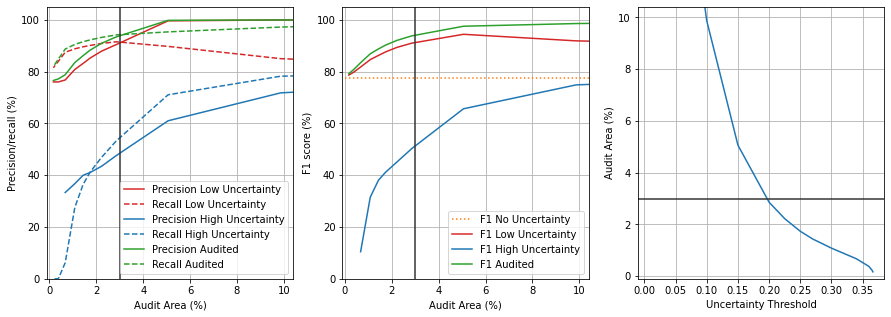

In [121]:
'''
xlim = [-0.3, 12.7]
xlim = [-0.1, 10.4]

ylim = [0, 105]
'''
trainer.plotUncertaintyAA(normalize_xlim=False)

In [122]:
trainer.getOptimalUncertaintyThreshold(bound = 0.0015)

ic| base.py:768 in getOptimalUncertaintyThreshold()
    bounds: (0.0015, 0.3663794801235199)


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


0.1408715596097929
threshold 0.1408715596097929


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1456538,)
    predicted_test_classified_incorrect.shape: (1456538,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1456538
    len(label_mask_current_deforestation_test): 25612345
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1456538
    len(label_mask_current_deforestation_test): 25612345


[0.99850329 0.88923975 0.35452239 0.05686859 0.63810684 0.73277223
 0.04434334]
0.22700792051372695
threshold 0.22700792051372695


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (558230,)
    predicted_test_classified_incorrect.shape: (558230,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 558230
    len(label_mask_current_deforestation_test): 25612345
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 558230
    len(label_mask_current_deforestation_test): 25612345


[0.87787801 0.90836589 0.67660958 0.02179535 0.43130395 0.46462843
 0.07929138]
0.28024311921958583
threshold 0.28024311921958583


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (334515,)
    predicted_test_classified_incorrect.shape: (334515,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 334515
    len(label_mask_current_deforestation_test): 25612345
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 334515
    len(label_mask_current_deforestation_test): 25612345


[0.82346023 0.89364581 0.73527384 0.01306069 0.39220155 0.33787884
 0.08898795]
0.2235962593474605
threshold 0.2235962593474605


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (577369,)
    predicted_test_classified_incorrect.shape: (577369,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 577369
    len(label_mask_current_deforestation_test): 25612345
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 577369
    len(label_mask_current_deforestation_test): 25612345


[0.88058946 0.90946953 0.67139034 0.02254261 0.43709364 0.47277605
 0.0780477 ]
0.19199823575680097
threshold 0.19199823575680097


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (793483,)
    predicted_test_classified_incorrect.shape: (793483,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 793483
    len(label_mask_current_deforestation_test): 25612345
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 793483
    len(label_mask_current_deforestation_test): 25612345


[0.91253908 0.91588293 0.60561527 0.03098049 0.49627298 0.55949802
 0.06654507]
0.17246958320045241
threshold 0.17246958320045241


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (982165,)
    predicted_test_classified_incorrect.shape: (982165,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 982165
    len(label_mask_current_deforestation_test): 25612345
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 982165
    len(label_mask_current_deforestation_test): 25612345


[0.94233235 0.91190012 0.53001537 0.03834733 0.54879007 0.63311983
 0.0590163 ]
0.2040676067911119
threshold 0.2040676067911119


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (701994,)
    predicted_test_classified_incorrect.shape: (701994,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 701994
    len(label_mask_current_deforestation_test): 25612345
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 701994
    len(label_mask_current_deforestation_test): 25612345


[0.90074962 0.9150752  0.63627277 0.02740842 0.46839622 0.5214701
 0.07135699]
0.1798017182965707
threshold 0.1798017182965707


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (903479,)
    predicted_test_classified_incorrect.shape: (903479,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 903479
    len(label_mask_current_deforestation_test): 25612345
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 903479
    len(label_mask_current_deforestation_test): 25612345


[0.92289596 0.91398116 0.56088164 0.03527514 0.53506047 0.60639953
 0.06115336]
0.19469776621755525
threshold 0.19469776621755525


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (771872,)
    predicted_test_classified_incorrect.shape: (771872,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 771872
    len(label_mask_current_deforestation_test): 25612345
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 771872
    len(label_mask_current_deforestation_test): 25612345


[0.91028023 0.91597099 0.6136181  0.03013672 0.48867507 0.54995496
 0.0677021 ]
0.19663090041264758
threshold 0.19663090041264758


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (756779,)
    predicted_test_classified_incorrect.shape: (756779,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 756779
    len(label_mask_current_deforestation_test): 25612345
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 756779
    len(label_mask_current_deforestation_test): 25612345


[0.9083793  0.91592311 0.61888795 0.02954743 0.48388329 0.54352152
 0.06848404]
0.1948691640882505
threshold 0.1948691640882505


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (770589,)
    predicted_test_classified_incorrect.shape: (770589,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 770589
    len(label_mask_current_deforestation_test): 25612345
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 770589
    len(label_mask_current_deforestation_test): 25612345


[0.91011794 0.91597471 0.61413054 0.03008662 0.48819354 0.54932903
 0.06776617]
0.19534846899061165
threshold 0.19534846899061165


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (766830,)
    predicted_test_classified_incorrect.shape: (766830,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 766830
    len(label_mask_current_deforestation_test): 25612345
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 766830
    len(label_mask_current_deforestation_test): 25612345


[0.90960193 0.9159242  0.61524398 0.02993986 0.48730251 0.54803338
 0.06795455]
0.1958383142055885
threshold 0.1958383142055885


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (762940,)
    predicted_test_classified_incorrect.shape: (762940,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 762940
    len(label_mask_current_deforestation_test): 25612345
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 762940
    len(label_mask_current_deforestation_test): 25612345


[0.90912398 0.91589848 0.61662312 0.02978798 0.48603217 0.5463698
 0.06815475]
0.19518466558150646
threshold 0.19518466558150646


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (768120,)
    predicted_test_classified_incorrect.shape: (768120,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 768120
    len(label_mask_current_deforestation_test): 25612345
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 768120
    len(label_mask_current_deforestation_test): 25612345


[0.90977936 0.9159355  0.61485174 0.02999023 0.48762126 0.54849885
 0.06788928]
0.19513284598569924
threshold 0.19513284598569924


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (768550,)
    predicted_test_classified_incorrect.shape: (768550,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 768550
    len(label_mask_current_deforestation_test): 25612345
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 768550
    len(label_mask_current_deforestation_test): 25612345


[0.90986039 0.91594952 0.61475685 0.03000701 0.48766097 0.54859748
 0.06787118]
0.19509950975807808
threshold 0.19509950975807808


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (768779,)
    predicted_test_classified_incorrect.shape: (768779,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 768779
    len(label_mask_current_deforestation_test): 25612345
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 768779
    len(label_mask_current_deforestation_test): 25612345
ic| base.py:772 in getOptimalUncertaintyThreshold()
    self.threshold_optimal: 0.19513284598569924


[0.90988772 0.91596045 0.61470624 0.03001596 0.4876977  0.54864584
 0.06785958]


In [123]:
trainer.getUncertaintyMetricsFromOptimalThreshold()

threshold 0.19513284598569924


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (768550,)
    predicted_test_classified_incorrect.shape: (768550,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 768550
    len(label_mask_current_deforestation_test): 25612345
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 768550
    len(label_mask_current_deforestation_test): 25612345


[0.90986039 0.91594952 0.61475685 0.03000701 0.48766097 0.54859748
 0.06787118]
threshold 0.19513284598569924
(25612345,) (25612345,)


ic| base.py:801 in getUncertaintyMetricsFromOptimalThreshold()
    self.m_optimal: {'AA': array([0.03000701]),
                     'UEO': array([0.06787118]),
                     'f1': 77.74,
                     'f1_H': array([0.51633756]),
                     'f1_L': array([0.9128948]),
                     'precision_H': array([0.48766097]),
                     'precision_L': array([0.90986039]),
                     'recall_H': array([0.54859748]),
                     'recall_L': array([0.91594952]),
                     'recall_Ltotal': array([0.61475685])}
ic| base.py:802 in getUncertaintyMetricsFromOptimalThreshold()
    self.m_audited_optimal: {'f1': array([0.94147351]),
                             'precision': array([0.93936856]),
                             'recall': array([0.94358793])}


cm_audited [[25444649     9627]
 [    8917   149152]]
[0.93936856 0.94358793]


{'metrics': {'precision_L': array([0.90986039]),
  'recall_L': array([0.91594952]),
  'recall_Ltotal': array([0.61475685]),
  'AA': array([0.03000701]),
  'precision_H': array([0.48766097]),
  'recall_H': array([0.54859748]),
  'UEO': array([0.06787118]),
  'f1_L': array([0.9128948]),
  'f1_H': array([0.51633756]),
  'f1': 77.74},
 'metrics_audited': {'precision': array([0.93936856]),
  'recall': array([0.94358793]),
  'f1': array([0.94147351])},
 'exp': 10}